In [ ]:
import torch
import torch.nn as nn
# plot the accuracy heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
# add pd to the path
import sys
# import pandas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  ConfusionMatrixDisplay,confusion_matrix
import sklearn.metrics as metrics

import matplotlib.pyplot as plt

# Import Data

In [ ]:
# read dataset magic04.data
read_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', header=None)
# add column names
read_data.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
# balance the dataset by undersampling the majority class g
# count the number of instances of each class
read_data['class'].value_counts()
# print the number of instances of each class
print(read_data['class'].value_counts())
read_data.describe()

g    12332
h     6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


# Balancing

In [ ]:
# get the indices of the majority class g
indices = read_data[read_data['class'] == 'g'].index
# get the size of the minority class h
sizeh = len(read_data[read_data['class'] == 'h'])
sizeg = len(read_data[read_data['class'] == 'g'])
# randomly sample the indices of the majority class g
indices = np.random.choice(indices, sizeg-sizeh, replace=False)
# delete from the majority class g
read_data = read_data.drop(indices)
print(read_data['class'].value_counts())
read_data.describe()

g    6688
h    6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,57.427027,23.691047,2.843601,0.379153,0.214721,-7.749555,7.633033,0.379291,31.273816,195.440481
std,47.075720,20.892724,0.476322,0.185166,0.112627,65.598179,56.492451,23.214146,26.986781,76.533539
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.635050,11.724975,2.496100,0.232600,0.126700,-24.518875,-14.765150,-10.919400,7.151800,142.655175
50%,38.681300,17.164700,2.754400,0.355050,0.196750,2.890250,14.737800,1.495350,23.261450,193.783100
75%,76.547025,26.165825,3.122200,0.506100,0.287525,23.468850,35.319175,11.226550,52.378500,243.397750
max,334.177000,256.382000,5.323300,0.893000,0.643000,575.240700,238.321000,179.851000,90.000000,495.561000


In [ ]:
# split into features and labels
features = read_data.drop(columns='class')
labels = read_data['class']
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0, stratify=labels,shuffle=True)
# print the number of instances of each class in the training set

# print the number of instances of each class in the test set
# drop a random point from the training set 
y_train.value_counts()

# print(labels_test['class'].value_counts())
#labels_train.describe()

h    4682
g    4681
Name: class, dtype: int64

In [ ]:
# remove a random point from h class
indices = y_train[y_train == 'h'].index
indices = np.random.choice(indices, 1, replace=False)
X_train = X_train.drop(indices)
y_train = y_train.drop(indices)
# print the number of instances of each class in the training set
y_train.value_counts()

h    4681
g    4681
Name: class, dtype: int64

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))

In [ ]:
# change X_train and X_test to tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
# X_train = X_train.type(torch.LongTensor)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
# X_test = X_test.type(torch.LongTensor)
# change y_train and y_test to tensors and change the labels to 0 and 1
y_train = y_train.replace({'g': 0, 'h': 1})
y_test = y_test.replace({'g': 0, 'h': 1})
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)
y_test = y_test.unsqueeze(-1)
y_train = y_train.unsqueeze(-1)
X_train.shape
# y_train.shape

torch.Size([9362, 10])

# DataLoaders

In [ ]:
#use data loader to load the data
from torch.utils.data import Dataset, DataLoader, TensorDataset
# imp
def loaders(X_train, y_train, X_test, y_test, batch_size):
    # data is int64
    train_set=TensorDataset(X_train, y_train)
    test_set=TensorDataset(X_test,y_test)
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)
    return train_loader, test_loader
    

# Data Loading

In [ ]:
(train_loader, test_loader) = loaders(X_train, y_train, X_test, y_test, 32)

# Training and Tuning

## Functions

### Neural Network Class

In [ ]:
# Create a dense neural network with 2 hidden layers 10 inputs and 1 output
class Net(nn.Module):
    def __init__(self,input_size,hidden_size_1,hidden_size_2,output_size):
        super(Net, self).__init__()
        self.input_layer=nn.Linear(input_size,hidden_size_1)
        self.hidden_layer_1=nn.Linear(hidden_size_1,hidden_size_2)
        self.hidden_layer_2=nn.Linear(hidden_size_2,output_size)
        self.output_layer=nn.Linear(output_size,1)
        self.dropout = nn.Dropout(p=0.1)
    def forward(self,x):
        x=F.relu(self.input_layer(x))
        x=F.relu(self.hidden_layer_1(x))
        x=F.relu(self.hidden_layer_2(x))
        x=torch.sigmoid(self.output_layer(x))
        return x

### Training function

In [ ]:
def train(model, train_loader,validation_fold ,optimizer, criterion, epochs,lr,device):
    model.train()
    for epoch in range(epochs):
        for data in train_loader:
            X_train, y_train = data
            X_train = X_train.to(device)
            y_train = y_train.to(device)
            optimizer.zero_grad()
            output = model(X_train)
            loss = criterion(output, y_train)
            loss.backward()
            optimizer.step()
    return model  

### Accuracy Test

In [ ]:
def test_accuracy(model, test_loader,device):
    # print accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            X_test, y_test = data
            X_test=X_test.to(device)
            y_test=y_test.to(device)
            output = model(X_test)
            for idx, i in enumerate(output):
                if torch.round(i) == y_test[idx]:
                    correct += 1
                total += 1
    print('Accuracy: ',round(correct*100/total, 3),'%')
    return round(correct/total, 3)   
    return accuracy

### K-Fold Validation function

In [ ]:
BATCH_SIZE = 64
def skfold_nn(X_train,y_train,epoch,lr,hidden_size1,hidden_size2,model,optimizer,criterion,device):
    # k fold cross validation
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    # enumerate splits and train model on all but one fold
    avg_acc = 0
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X_train, y_train)):
        # split data
        train_fold_loader,validation_fold_loader=loaders(
            X_train[train_ids], y_train[train_ids], X_train[test_ids], y_train[test_ids], BATCH_SIZE)
        # reset weights for k-fold cross validation    
      
        for layer in model.children():
          if hasattr(layer, 'reset_parameters'):
             layer.reset_parameters()
        # train model
        print('Fold ',fold)
        model=train(model, train_fold_loader,validation_fold_loader, optimizer, criterion, epoch,lr,device)
        acc=test_accuracy(model, validation_fold_loader,device)
        avg_acc += acc
    avg_acc = avg_acc/10
    return avg_acc
    
    

### Train model function for tuning

In [ ]:
# Train the model and tune hidden layer size 1 and 2 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_model(X_train, y_train, X_test, y_test, epochs, lr,hidden_size_1_min,hidden_size_1_max,hidden_size_2_min,hidden_size_2_max,steps):
    # define the loss function            
    acc=np.zeros(((hidden_size_1_max-hidden_size_1_min)//steps,(hidden_size_2_max-hidden_size_2_min)//steps))
    max_acc = 0
    best_hidden_size_1 = 0
    best_hidden_size_2 = 0
    criterion = nn.BCELoss()
    # train the model
    start=5
    for hidden_size_1 in range(hidden_size_1_min, hidden_size_1_max,steps):
        for hidden_size_2 in range(hidden_size_2_min,hidden_size_2_max,steps):
            model = Net(10, hidden_size_1, hidden_size_2, 1).to(device)
            # define the optimizer
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)
            # train the model
            avg_acc = skfold_nn(X_train, y_train, epochs, lr, hidden_size_1, hidden_size_2, model, optimizer, criterion,device)
            acc[(hidden_size_1-hidden_size_1_min)//steps][(hidden_size_2-hidden_size_2_min)//steps] = avg_acc
            # print accuracy
            print('Hidden size 1: {} \tHidden size 2: {} \tAccuracy: {} %'.format(hidden_size_1, hidden_size_2,round(avg_acc*100,3)))
            if avg_acc > max_acc:
                max_acc = avg_acc
                best_hidden_size_1 = hidden_size_1
                best_hidden_size_2 = hidden_size_2
    print('Best hidden size 1: {} \tBest hidden size 2: {} \tBest Accuracy: {} %'.format(best_hidden_size_1, best_hidden_size_2, round(max_acc*100,3)))
    return acc,max_acc, best_hidden_size_1, best_hidden_size_2

    

### Train model power of 2s for tuning

In [ ]:
# Train the model and tune hidden layer size 1 and 2 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_model_power2s(X_train, y_train, X_test, y_test, epochs, lr,hidden_size_1_min,hidden_size_1_max,hidden_size_2_min,hidden_size_2_max,steps):
    # define the loss function            
    acc=np.zeros(((hidden_size_1_max-hidden_size_1_min)//steps,(hidden_size_2_max-hidden_size_2_min)//steps))
    max_acc = 0
    best_hidden_size_1 = 0
    best_hidden_size_2 = 0
    criterion = nn.BCELoss()
    # train the model
    start=5
    for hidden_size_1 in range(hidden_size_1_min, hidden_size_1_max,steps):
        for hidden_size_2 in range(hidden_size_2_min,hidden_size_2_max,steps):
            model = Net(10, 2**hidden_size_1, 2**hidden_size_2, 1).to(device)
            # define the optimizer
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)
            # train the model
            avg_acc = skfold_nn(X_train, y_train, epochs, lr, hidden_size_1, hidden_size_2, model, optimizer, criterion,device)
            acc[(hidden_size_1-hidden_size_1_min)//steps][(hidden_size_2-hidden_size_2_min)//steps] = avg_acc
            # print accuracy
            print('Hidden size 1: {} \tHidden size 2: {} \tAccuracy: {} %'.format(2**hidden_size_1, 2**hidden_size_2, round(avg_acc*100,3)))
            if avg_acc > max_acc:
                max_acc = avg_acc
                best_hidden_size_1 = hidden_size_1
                best_hidden_size_2 = hidden_size_2
    print('Best hidden size 1: {} \tBest hidden size 2: {} \tBest Accuracy: {} %'.format(2**best_hidden_size_1, 2**best_hidden_size_2, round(max_acc*100,3)))
    return acc,max_acc, best_hidden_size_1, best_hidden_size_2

    

## Tuning

### Tuning using power of 2s from 2^(5,9), 2^(5,9)

In [ ]:
# call the function
(acc,max_acc, best_hidden_size_1, best_hidden_size_2)=train_model_power2s(X_train, y_train,X_test,y_test, 10, 0.0001,5,9,5,9,1)

Fold  0
Accuracy:  50.053 %
Fold  1
Accuracy:  50.053 %
Fold  2
Accuracy:  50.053 %
Fold  3
Accuracy:  50.0 %
Fold  4
Accuracy:  78.526 %
Fold  5
Accuracy:  50.0 %
Fold  6
Accuracy:  50.0 %
Fold  7
Accuracy:  76.923 %
Fold  8
Accuracy:  50.0 %
Fold  9
Accuracy:  78.205 %
Hidden size 1: 32 	Hidden size 2: 32 	Accuracy: 58.39 %
Fold  0
Accuracy:  50.053 %
Fold  1
Accuracy:  75.454 %
Fold  2
Accuracy:  50.053 %
Fold  3
Accuracy:  77.35 %
Fold  4
Accuracy:  50.0 %
Fold  5
Accuracy:  76.496 %
Fold  6
Accuracy:  50.0 %
Fold  7
Accuracy:  50.0 %
Fold  8
Accuracy:  50.0 %
Fold  9
Accuracy:  76.709 %
Hidden size 1: 32 	Hidden size 2: 64 	Accuracy: 60.63 %
Fold  0
Accuracy:  79.829 %
Fold  1
Accuracy:  77.695 %
Fold  2
Accuracy:  49.947 %
Fold  3
Accuracy:  50.0 %
Fold  4
Accuracy:  80.342 %
Fold  5
Accuracy:  50.0 %
Fold  6
Accuracy:  50.0 %
Fold  7
Accuracy:  79.808 %
Fold  8
Accuracy:  80.235 %
Fold  9
Accuracy:  77.457 %
Hidden size 1: 32 	Hidden size 2: 128 	Accuracy: 67.52 %
Fold  0
Accura

[32, 64, 128, 256]


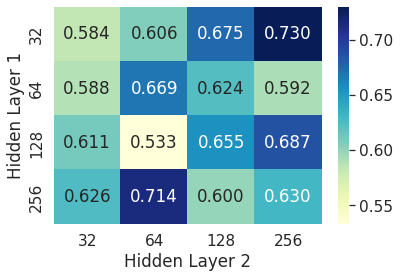

In [ ]:
# plot heatmap of 2d array with step 5 for hidden layer size 1 and 2 starting from 5
steps_power_2=[2**i for i in range(5,9,1)]
print(steps_power_2)
sns.set(font_scale=1.4)
s=sns.heatmap(acc,xticklabels=steps_power_2,yticklabels=steps_power_2,annot=True,fmt=".3f",cmap="YlGnBu")
s.set_xlabel("Hidden Layer 2")
s.set_ylabel("Hidden Layer 1")
plt.show()


### Tuning from (5,50),(5,55)

In [ ]:
(acc,max_acc, best_hidden_size_1, best_hidden_size_2)=train_model(X_train, y_train,X_test,y_test, 10, 0.001,5,55,5,55,5)

Fold  0
Accuracy:  82.07 %
Fold  1
Accuracy:  81.644 %
Fold  2
Accuracy:  50.0 %
Fold  3
Accuracy:  81.41 %
Fold  4
Accuracy:  50.0 %
Fold  5
Accuracy:  50.0 %
Fold  6
Accuracy:  82.051 %
Fold  7
Accuracy:  50.0 %
Fold  8
Accuracy:  50.0 %
Fold  9
Accuracy:  82.479 %
Hidden size 1: 5 	Hidden size 2: 5 	Accuracy: 65.97 %
Fold  0
Accuracy:  82.818 %
Fold  1
Accuracy:  78.442 %
Fold  2
Accuracy:  82.479 %
Fold  3
Accuracy:  50.0 %
Fold  4
Accuracy:  78.953 %
Fold  5
Accuracy:  50.0 %
Fold  6
Accuracy:  81.41 %
Fold  7
Accuracy:  79.701 %
Fold  8
Accuracy:  82.372 %
Fold  9
Accuracy:  82.158 %
Hidden size 1: 5 	Hidden size 2: 10 	Accuracy: 74.84 %
Fold  0
Accuracy:  49.947 %
Fold  1
Accuracy:  84.525 %
Fold  2
Accuracy:  78.739 %
Fold  3
Accuracy:  77.244 %
Fold  4
Accuracy:  80.342 %
Fold  5
Accuracy:  76.816 %
Fold  6
Accuracy:  82.265 %
Fold  7
Accuracy:  80.662 %
Fold  8
Accuracy:  81.944 %
Fold  9
Accuracy:  50.0 %
Hidden size 1: 5 	Hidden size 2: 15 	Accuracy: 74.23 %
Fold  0
Accurac

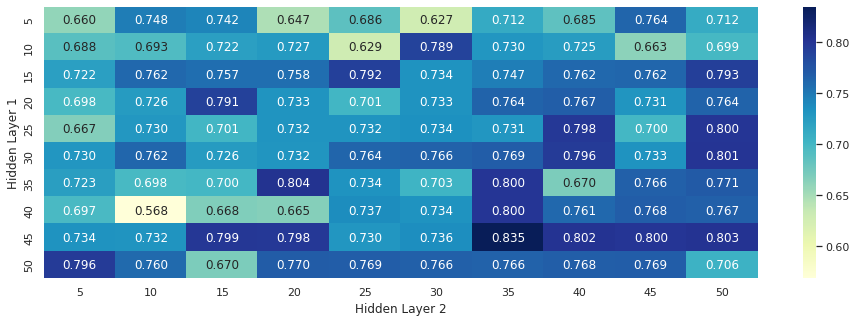

In [ ]:
# plot heatmap of 2d array with step 5 for hidden layer size 1 and 2 starting from 5
steps_5=[i for i in range(5,55,5)]
sns.set(font_scale=1)
plt.figure(figsize=(16,5))
s=sns.heatmap(acc,xticklabels=steps_5,yticklabels=steps_5,annot=True,fmt=".3f",cmap="YlGnBu")
s.set_xlabel("Hidden Layer 2")
s.set_ylabel("Hidden Layer 1")
plt.show()

### Tuning from (40,45),(35,41)

In [ ]:
(acc,max_acc, best_hidden_size_1, best_hidden_size_2)=train_model(X_train, y_train,X_test,y_test, 10, 0.001,40,45,35,41,1)

Fold  0
Accuracy:  83.778 %
Fold  1
Accuracy:  84.418 %
Fold  2
Accuracy:  82.158 %
Fold  3
Accuracy:  50.0 %
Fold  4
Accuracy:  82.158 %
Fold  5
Accuracy:  84.402 %
Fold  6
Accuracy:  82.265 %
Fold  7
Accuracy:  84.829 %
Fold  8
Accuracy:  50.0 %
Fold  9
Accuracy:  85.043 %
Hidden size 1: 40 	Hidden size 2: 35 	Accuracy: 76.91 %
Fold  0
Accuracy:  84.952 %
Fold  1
Accuracy:  82.284 %
Fold  2
Accuracy:  83.761 %
Fold  3
Accuracy:  82.372 %
Fold  4
Accuracy:  81.944 %
Fold  5
Accuracy:  50.0 %
Fold  6
Accuracy:  83.654 %
Fold  7
Accuracy:  84.722 %
Fold  8
Accuracy:  84.722 %
Fold  9
Accuracy:  84.295 %
Hidden size 1: 40 	Hidden size 2: 36 	Accuracy: 80.28 %
Fold  0
Accuracy:  83.031 %
Fold  1
Accuracy:  85.592 %
Fold  2
Accuracy:  82.372 %
Fold  3
Accuracy:  84.295 %
Fold  4
Accuracy:  50.0 %
Fold  5
Accuracy:  50.0 %
Fold  6
Accuracy:  83.013 %
Fold  7
Accuracy:  81.624 %
Fold  8
Accuracy:  84.936 %
Fold  9
Accuracy:  82.585 %
Hidden size 1: 40 	Hidden size 2: 37 	Accuracy: 76.74 %
Fo

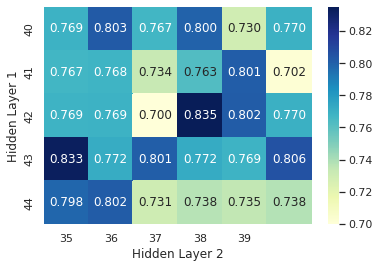

In [ ]:
step_1_h1=[i for i in range(40,45,1)]
step_1_h2=[i for i in range(35,40,1)]
sns.set(font_scale=1)
s=sns.heatmap(acc,xticklabels=step_1_h2,yticklabels=step_1_h1,annot=True,fmt=".3f",cmap="YlGnBu")
s.set_xlabel("Hidden Layer 2")
s.set_ylabel("Hidden Layer 1")
plt.show()

# Choosing the best epoch and lr

In [ ]:
model_1 = Net(10, 42, 38, 1).to(device)
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)
criterion = nn.BCELoss()
train(model_1, train_loader, test_loader, optimizer, criterion, 100, 0.001,device)
acc=test_accuracy(model_1, test_loader,device)

Accuracy:  84.002 %


In [ ]:
model_1 = Net(10, 42, 38, 1).to(device)
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)
criterion = nn.BCELoss()
train(model_1, train_loader, test_loader, optimizer, criterion, 150, 0.001,device)
acc=test_accuracy(model_1, test_loader,device)

Accuracy:  84.575 %


In [ ]:
model_1 = Net(10, 42, 38, 1).to(device)
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.0001)
criterion = nn.BCELoss()
train(model_1, train_loader, test_loader, optimizer, criterion, 150, 0.0001,device)
acc=test_accuracy(model_1, test_loader,device)

Accuracy:  84.65 %


In [ ]:
model_1 = Net(10, 42, 38, 1).to(device)
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.0001)
criterion = nn.BCELoss()
train(model_1, train_loader, test_loader, optimizer, criterion, 200, 0.0001,device)
acc=test_accuracy(model_1, test_loader,device)

Accuracy:  85.373 %


# Save Best Model

In [ ]:
torch.save(model_1.state_dict(), 'best_model.pt')

# Load Best Model

In [ ]:
# get recall and precision and f1 score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def get_metrics(model, test_loader,device):
    y_pred = []
    y_true = []
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            outputs = outputs.cpu().numpy()
            labels = labels.cpu().numpy()
            y_pred.extend(np.round(outputs))
            y_true.extend(labels)
    print('Accuracy: ', round(accuracy_score(y_true, y_pred)*100,3),'%')
    print('Precision: ', round(precision_score(y_true, y_pred)*100,3),'%')
    print('Recall: ', round(recall_score(y_true, y_pred)*100,3),'%')
    print('F1 score: ', round(f1_score(y_true, y_pred)*100,3),'%')
    disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred))
    disp.plot()
    plt.show()


In [ ]:
model = Net(10,42,38,1).to(device)
model.load_state_dict(torch.load('best_model.pt'))
model.eval()


Net(
  (input_layer): Linear(in_features=10, out_features=42, bias=True)
  (hidden_layer_1): Linear(in_features=42, out_features=38, bias=True)
  (hidden_layer_2): Linear(in_features=38, out_features=1, bias=True)
  (output_layer): Linear(in_features=1, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

# Accuracy, Precision, Recall and F1 Score of best model

Accuracy:  85.373 %
Precision:  88.289 %
Recall:  81.555 %
F1 score:  84.789 %


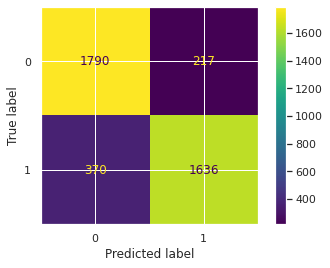

In [ ]:
get_metrics(model,test_loader,device)